In [49]:
import os
import logging
from tqdm import tqdm
from PIL import Image

In [50]:
# logging settigns
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

In [51]:
def check_is_dir(path):
    if not os.path.isdir(path):
        raise ValueError(f"Provided path: {path} is not a directory.")
    return True

In [52]:
def filter_images(list_of_files):
    valid_extensions = [".jpg", ".jpeg", ".png", ".webp"]
    return [
        file
        for file in list_of_files
        if any(file.endswith(ext) for ext in valid_extensions)
    ]

In [53]:
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

In [54]:
def read_images_from_dir(dir_path):
    check_is_dir(dir_path)
    files = os.listdir(dir_path)
    image_files = filter_images(files)
    image_paths = [os.path.join(dir_path, file) for file in image_files]
    images = [load_image(image_path) for image_path in tqdm(image_paths)]
    logging.info(f"Load: {len(images)} from {dir_path}")
    return images

In [55]:
loaded_images = read_images_from_dir("raw_images/cat")

100%|██████████| 217/217 [00:05<00:00, 42.01it/s]
2024-06-17 16:23:38,574 - INFO - Load: 217 from raw_images/cat


In [56]:
def max_resolution_rescale(image, max_width, max_height):
    width, height = image.size
    if width > max_width or height > max_height:
        ratio = min(max_width / width, max_height / height)
        new_width = int(width * ratio)
        new_height = int(height * ratio)
        image = image.resize((new_width, new_height), Image.LANCZOS)
    return image

In [57]:
max_size = 1024
resized_images = list(
    map(lambda x: max_resolution_rescale(x, max_size, max_size), tqdm(loaded_images))
)

100%|██████████| 217/217 [00:06<00:00, 34.97it/s]


In [58]:
def min_resolution_filter(image, min_width, min_height):
    width, height = image.size
    return width >= min_width and height >= min_height

In [59]:
min_size = 224
filtered_images = list(
    filter(lambda x: min_resolution_filter(x, min_size, min_size), tqdm(resized_images))
)

100%|██████████| 217/217 [00:00<00:00, 1426589.29it/s]


In [60]:
import matplotlib.pyplot as plt

In [61]:
def plot_image(image):
    plt.imshow(image)
    plt.axis("off")
    plt.show()

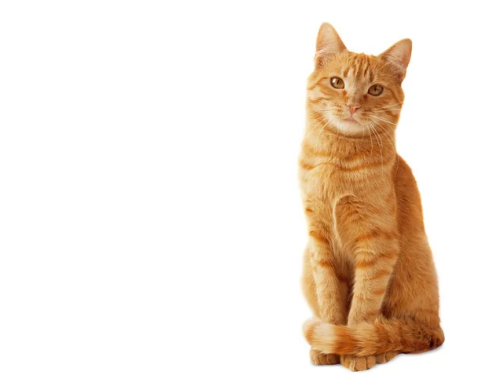

In [62]:
plot_image(filtered_images[14])

In [63]:
def center_crop(image, new_widht, new_height):
    width, height = image.size
    left = (width - new_widht) / 2
    top = (height - new_height) / 2
    right = (width + new_widht) / 2
    bottom = (height + new_height) / 2
    cropped_image = image.crop((left, top, right, bottom))
    logging.info(f"Center cropped image to {new_height}x{new_height}")
    return cropped_image

2024-06-17 16:23:44,978 - INFO - Center cropped image to 224x224


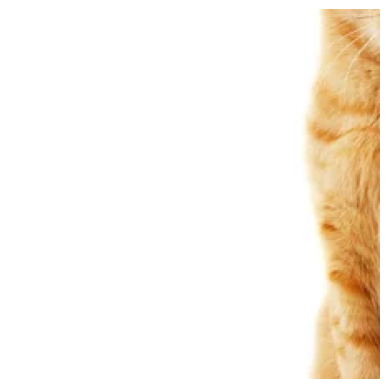

In [64]:
plot_image(center_crop(filtered_images[14], min_size, min_size))

In [65]:
from smartcrop import detect

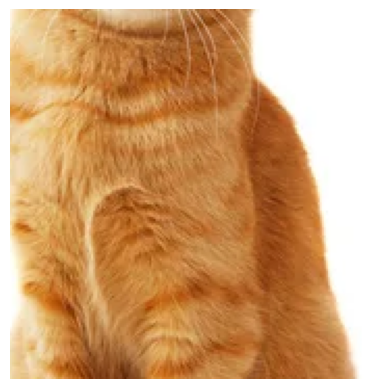

In [66]:
cropped_image = detect(filtered_images[14], square=True)
plot_image(cropped_image)

In [67]:
cropped_images = list(map(lambda x: detect(x, square=True), tqdm(filtered_images)))

100%|██████████| 202/202 [00:09<00:00, 21.75it/s]


In [68]:
import numpy as np

In [69]:
def save_image(image, save_path):
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    if not isinstance(image, Image.Image):
        raise ValueError("Input image must be a numpy array or PIL Image.")

    if image.mode != "RGB":
        image = image.convert("RGB")

    image.save(save_path)
    logging.info(f"Saved image to {save_path}")

In [70]:
def create_directory(dir_path):
    if not os.path.isdir(dir_path):
        os.makedirs(dir_path)
        print(f"Directory created: {dir_path}")
    else:
        print(f"Directory already exists {dir_path}")

In [71]:
def save_image_to_dir(images, dir_path):
    create_directory(dir_path)
    check_is_dir(dir_path)

    for idx, image in tqdm(enumerate(images, 1)):
        save_path = os.path.join(dir_path, f"image_{idx}.png")
        save_image(image, save_path)

    return True

In [72]:
save_image_to_dir(cropped_images, "processed_images/cat")

Directory created: processed_images/cat


0it [00:00, ?it/s]2024-06-17 16:23:54,587 - INFO - Saved image to processed_images/cat/image_1.png
2024-06-17 16:23:54,603 - INFO - Saved image to processed_images/cat/image_2.png
2024-06-17 16:23:54,646 - INFO - Saved image to processed_images/cat/image_3.png
3it [00:00, 22.44it/s]2024-06-17 16:23:54,874 - INFO - Saved image to processed_images/cat/image_4.png
2024-06-17 16:23:54,883 - INFO - Saved image to processed_images/cat/image_5.png
2024-06-17 16:23:54,933 - INFO - Saved image to processed_images/cat/image_6.png
6it [00:00, 13.42it/s]2024-06-17 16:23:54,953 - INFO - Saved image to processed_images/cat/image_7.png
2024-06-17 16:23:55,080 - INFO - Saved image to processed_images/cat/image_8.png
8it [00:00, 13.47it/s]2024-06-17 16:23:55,139 - INFO - Saved image to processed_images/cat/image_9.png
2024-06-17 16:23:55,211 - INFO - Saved image to processed_images/cat/image_10.png
10it [00:00, 14.04it/s]2024-06-17 16:23:55,241 - INFO - Saved image to processed_images/cat/image_11.png


True